In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [8]:
# fashion_mnist图像分类数据集
fashion_mnist = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

#得到的是np
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


AttributeError: module 'tensorflow.keras.datasets.fashion_mnist' has no attribute 'DESC'

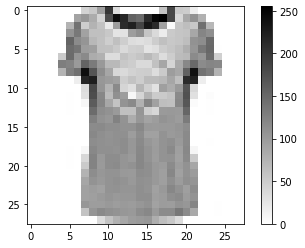

131
7


In [10]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.colorbar()
    plt.show()


#依次看一下x_train[0]，x_train[1]，x_train[2]就可以理解下面的循环
# print(x_train[0])
show_single_image(x_train[1])
print(x_train[2,15,20])
print(y_train[2])

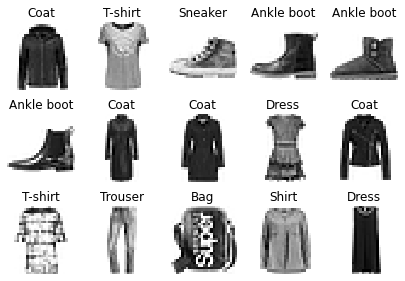

In [8]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)  #x和y的样本数一致
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')#去除坐标系
            plt.title(class_names[y_data[index]])
    plt.show()
#已知的图片类别
# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
#只是打印了前15个样本
show_imgs(3, 5, x_train, y_train, class_names)


In [11]:
# tf.keras.models.Sequential(),可以看下官网
# 功能：Sequential将线性的层堆叠到一个tf.keras.Model

model = keras.models.Sequential()
#把28*28的图片展平为一个一维向量,通过下面打印可以看到两个想乘
model.add(keras.layers.Flatten(input_shape=[28, 28]))
print(model.output_shape)
#Dense是全连接层，添加全连接层，单元数是300，可以对比300和100的差异
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])



# reason for sparse: y->index. y->one_hot->[] 
#loss是损失函数 y如果只是一个数，那么使用sparse_categorical_crossentropy
#sparse_categorical_crossentropy计算稀疏分类crossentropy损失。
# 如果是一个向量，那么使用categorical_crossentropy，详情看课件
#optimizer是优化方法
# metrics模型在训练和测试期间要评估的指标列表
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

(None, 784)


In [12]:
model.layers

In [13]:
#可以来算一下参数个数
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]
#W是矩阵，b是一个偏置，是一个向量

In [14]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 3.5264 - accuracy: 0.6548 - val_loss: 0.7128 - val_accuracy: 0.7286
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6641 - accuracy: 0.7380 - val_loss: 0.6121 - val_accuracy: 0.7678
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5806 - accuracy: 0.7677 - val_loss: 0.5999 - val_accuracy: 0.7804
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5324 - accuracy: 0.7939 - val_loss: 0.5260 - val_accuracy: 0.8068
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4956 - accuracy: 0.8117 - val_loss: 0.5063 - val_accuracy: 0.8194
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4710 - accuracy: 0.8250 - val_loss: 0.4992 - val_accuracy: 0.8246
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4497 - accuracy: 0.8326 - val_loss: 0.4813 - val_accuracy:

In [15]:
type(history)

tensorflow.python.keras.callbacks.History

In [16]:
#十次历史的信息
history.history

{'loss': [3.526421070098877,
  0.6640735268592834,
  0.5806258320808411,
  0.5323541760444641,
  0.49562233686447144,
  0.47102808952331543,
  0.44966575503349304,
  0.43150994181632996,
  0.4182991683483124,
  0.4062952995300293,
  0.39659231901168823,
  0.3878794312477112,
  0.3791086971759796,
  0.3712309002876282,
  0.36471834778785706,
  0.3590509295463562,
  0.35498350858688354,
  0.34851086139678955,
  0.344339519739151,
  0.3391631841659546],
 'accuracy': [0.6548363566398621,
  0.7379817962646484,
  0.7677454352378845,
  0.7939272522926331,
  0.8117091059684753,
  0.8250181674957275,
  0.8325636386871338,
  0.8387818336486816,
  0.8447636365890503,
  0.8504363894462585,
  0.8519636392593384,
  0.8540727496147156,
  0.8589454293251038,
  0.8614909052848816,
  0.8631454706192017,
  0.8657090663909912,
  0.8669272661209106,
  0.8686545491218567,
  0.8706363439559937,
  0.8718000054359436],
 'val_loss': [0.7127981185913086,
  0.6121256351470947,
  0.5999338626861572,
  0.5260055065

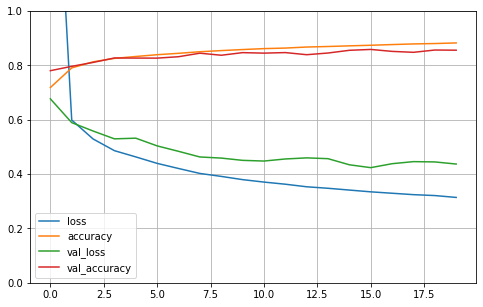

In [28]:
#画线要注意的是损失是不一定在零到1之间的
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [29]:
model.evaluate(x_test, y_test, verbose=0)

[0.473375141620636, 0.8464000225067139]

In [18]:
#计算标签和预测之间的crossentropy(交叉熵)损失
cce = keras.losses.SparseCategoricalCrossentropy()
loss = cce(
  [0, 1, 2],
  [[.9, .05, .05], [.05, .89, .06], [.05, .01, .94]])
print('Loss: ', loss.numpy())  

Loss:  0.09458992
